# Importing Library Files:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
import re
import squarify

In [2]:
transaction_data = pd.read_excel("C:\\Users\\Nitai CalpakkamAnand\\Documents\\Data Science_Besant\\Materials\\Quantium\\QVI_transaction_data.xlsx")
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [3]:
purchase_data = pd.read_csv("C:\\Users\\Nitai CalpakkamAnand\\Documents\\Data Science_Besant\\Materials\\Quantium\\QVI_purchase_behaviour.csv")
purchase_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


# Data Pre-processing:

In [4]:
transaction_data.isnull().any()

DATE              False
STORE_NBR         False
LYLTY_CARD_NBR    False
TXN_ID            False
PROD_NBR          False
PROD_NAME         False
PROD_QTY          False
TOT_SALES         False
dtype: bool

In [5]:
purchase_data.isnull().any()

LYLTY_CARD_NBR      False
LIFESTAGE           False
PREMIUM_CUSTOMER    False
dtype: bool

**Null Value check complete.** There are no null values in each of the datasets.

## Datatype Checking:

In [6]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
DATE              264836 non-null int64
STORE_NBR         264836 non-null int64
LYLTY_CARD_NBR    264836 non-null int64
TXN_ID            264836 non-null int64
PROD_NBR          264836 non-null int64
PROD_NAME         264836 non-null object
PROD_QTY          264836 non-null int64
TOT_SALES         264836 non-null float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


We see that the date column is of integer type in the date_offset format. Need to convert into proper date format. The STORE_NBR, LYLTY_CARD_NBR, TXN_ID and PROD_NBR are integers that are nominal. We also see that PROD_NAME is categorical but it does not require to be converted into numerical data because PROD_NBR already has its numerical counterpart. 

purchase_data.info()

In [8]:
transaction_data.DATE = pd.to_datetime(transaction_data.DATE, unit='D', origin='1901-01-01')
transaction_data.DATE

0        2019-10-19
1        2020-05-15
2        2020-05-21
3        2019-08-19
4        2019-08-20
5        2020-05-20
6        2020-05-17
7        2020-05-17
8        2019-08-22
9        2019-08-20
10       2020-05-18
11       2019-08-22
12       2020-05-19
13       2019-08-19
14       2020-05-16
15       2020-05-20
16       2019-08-20
17       2019-08-16
18       2019-08-19
19       2020-05-17
20       2020-05-20
21       2019-08-18
22       2019-08-18
23       2019-08-21
24       2019-08-17
25       2020-05-16
26       2019-08-21
27       2020-05-16
28       2019-08-17
29       2020-05-21
            ...    
264806   2019-10-07
264807   2020-01-21
264808   2020-03-08
264809   2019-08-26
264810   2019-09-23
264811   2019-09-25
264812   2019-12-18
264813   2020-01-21
264814   2019-09-01
264815   2019-11-06
264816   2020-05-30
264817   2020-06-18
264818   2020-03-09
264819   2020-06-16
264820   2019-08-30
264821   2020-05-30
264822   2019-08-02
264823   2020-03-18
264824   2020-03-14


In [9]:
transaction_data.DATE= pd.to_datetime(transaction_data.DATE)
transaction_data.DATE.head()

0   2019-10-19
1   2020-05-15
2   2020-05-21
3   2019-08-19
4   2019-08-20
Name: DATE, dtype: datetime64[ns]

In [10]:
transaction_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2019-10-19,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2020-05-15,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2020-05-21,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2019-08-19,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2019-08-20,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
5,2020-05-20,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
6,2020-05-17,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
7,2020-05-17,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6
8,2019-08-22,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9
9,2019-08-20,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2


**Datatype Checking Done:** All datatypes are accurately designated to each column of each dataset.

## Outlier Checking:

In [11]:
transaction_data.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES'],
      dtype='object')

In [12]:
print(transaction_data.DATE.dtype)

datetime64[ns]


In [13]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
DATE              264836 non-null datetime64[ns]
STORE_NBR         264836 non-null int64
LYLTY_CARD_NBR    264836 non-null int64
TXN_ID            264836 non-null int64
PROD_NBR          264836 non-null int64
PROD_NAME         264836 non-null object
PROD_QTY          264836 non-null int64
TOT_SALES         264836 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.2+ MB


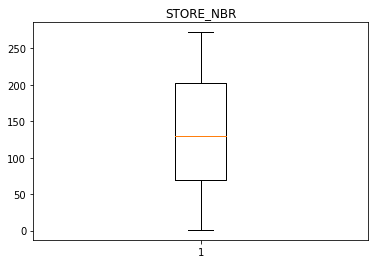

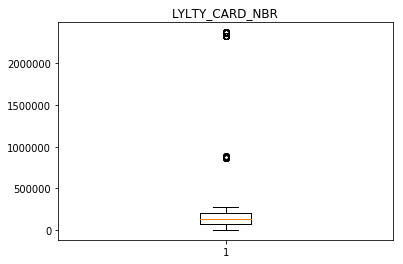

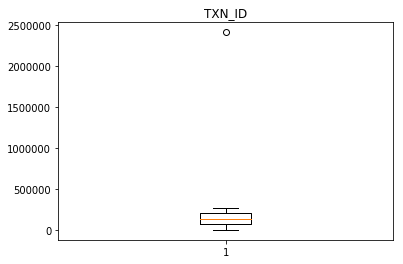

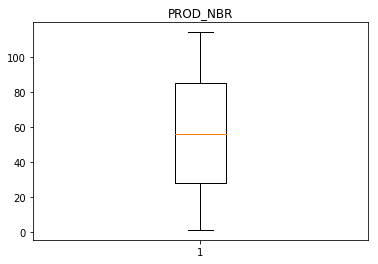

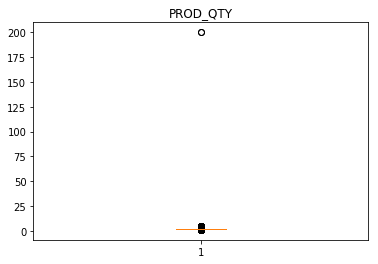

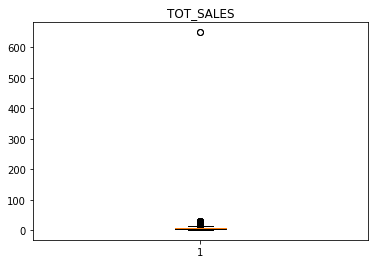

In [14]:
for column in transaction_data.columns:
    if transaction_data[column].dtype=='int64' or transaction_data[column].dtype =='float64':
        plt.subplots()
        plt.boxplot(transaction_data[column])
        plt.title(column)

In [15]:
transaction_data.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


**We see that there are outliers in PROD_QTY and TOT_SALES.**


In [16]:
transaction_data.groupby('LYLTY_CARD_NBR', as_index=False)['PROD_QTY'].sum().nlargest(10,'PROD_QTY')

,LYLTY_CARD_NBR,PROD_QTY
59694,226000,400
42813,162039,36
60925,230078,36
45905,172032,35
3686,13138,34
31654,116181,34
34943,128178,33
68901,257202,33
17292,63197,32
25958,94185,32


 **We remove this customer as it is not normal for a customer to purchase 400 at once. He might be purchasing for commercial purposes and hence, we disregard him as a normal user.**

In [17]:
transaction_data = transaction_data.drop(transaction_data[transaction_data['LYLTY_CARD_NBR']==226000].index)
transaction_data.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264834.000000,2.648340e+05,2.648340e+05,264834.000000,264834.000000,264834.000000
mean,135.079423,1.355488e+05,1.351576e+05,56.583554,1.905813,7.299346
std,76.784063,8.057990e+04,7.813292e+04,32.826444,0.343436,2.527241
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.000000,7.002100e+04,6.760050e+04,28.000000,2.000000,5.400000
50%,130.000000,1.303570e+05,1.351365e+05,56.000000,2.000000,7.400000
75%,203.000000,2.030940e+05,2.026998e+05,85.000000,2.000000,9.200000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000


In [18]:
transaction_data[transaction_data['LYLTY_CARD_NBR']==226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES


In [19]:
transaction_data.groupby('LYLTY_CARD_NBR', as_index=False)['PROD_QTY'].sum().nlargest(10,'PROD_QTY')

,LYLTY_CARD_NBR,PROD_QTY
42813,162039,36
60924,230078,36
45905,172032,35
3686,13138,34
31654,116181,34
34943,128178,33
68900,257202,33
17292,63197,32
25958,94185,32
28457,104117,32


**Outlier Treatment done:** Outliers in the transaction data have been identified and not removed as it does not affect the skewness of the data. The outliers lie in the upper region of the median while the mean is less than the median. This clearly proves that the outliers do not skew the mean of the data. 

purchase_data does not have numerical data to inspect outliers.

## Checking for Categorical data:

In [20]:
combined_df = pd.merge(transaction_data, purchase_data, on='LYLTY_CARD_NBR')
combined_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2019-10-19,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2020-05-15,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2019-11-12,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget
3,2020-03-10,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget
4,2020-05-21,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget


In [21]:
combined_df.to_csv('combined_data.csv')

In [22]:
transaction_data.PROD_NAME.nunique()

114

In [26]:
purchase_data['LIFESTAGE'] = purchase_data['LIFESTAGE'].astype('category')
purchase_data['PREMIUM_CUSTOMER'] = purchase_data['PREMIUM_CUSTOMER'].astype('category')
purchase_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
LYLTY_CARD_NBR      72637 non-null int64
LIFESTAGE           72637 non-null category
PREMIUM_CUSTOMER    72637 non-null category
dtypes: category(2), int64(1)
memory usage: 709.9 KB


In [27]:
purchase_data[['LIFESTAGE','PREMIUM_CUSTOMER']] = purchase_data[['LIFESTAGE','PREMIUM_CUSTOMER']].apply(lambda x:x.cat.codes)
purchase_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,6,2
1,1002,6,1
2,1003,5,0
3,1004,3,1
4,1005,0,1


## Joining the two datasets:

In [28]:
customer_df = pd.merge(transaction_data, purchase_data, on='LYLTY_CARD_NBR')
customer_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2019-10-19,1,1000,1,5,44,2,6.0,6,2
1,2020-05-15,1,1307,348,66,1,3,6.3,0,0
2,2019-11-12,1,1307,346,96,108,2,3.8,0,0
3,2020-03-10,1,1307,347,54,2,1,2.1,0,0
4,2020-05-21,1,1343,383,61,79,2,2.9,0,0


In [29]:
customer_df.isnull().any()

DATE                False
STORE_NBR           False
LYLTY_CARD_NBR      False
TXN_ID              False
PROD_NBR            False
PROD_NAME           False
PROD_QTY            False
TOT_SALES           False
LIFESTAGE           False
PREMIUM_CUSTOMER    False
dtype: bool

In [30]:
customer_df.to_csv('customer_df.csv')

In [31]:
combined_df['PROD_NAME'].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g', 'WW Original Stacked Chips 160g',
       'CCs Original 175g', 'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Tyrrells Crisps     Lightly Salted 165g',
       'Kettle Tortilla ChpsFeta&Garlic 150g',
       'Dorito Corn Chp     Supreme 380g', 'Doritos Mexicana    170g',
       'Smiths Crinkle Chips Salt & Vinegar 330g', 'Kettle Original 175g',
       'Tyrrells Crisps     Ched & Chives 165g',
       'Infuzions BBQ Rib   Prawn Crackers 110g',
       'Grain Waves         Sweet Chilli 210g',
       'Old El Paso Salsa   Dip Tomato Med 300g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Thins Potato Chips  Hot & Spicy 175g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Red Rock Deli Thai  Chilli&Lime 150g',
       'GrnWves Plus Btroot

In [32]:
naturalchipcompany = ['Natural Chip        Compny','Natural ChipCo','NCC','Natural Chip Co']
doritos = ['Dorito','Doritos']
smiths = ['Smiths','Smith']
grainwaves = ['Grain Waves','GrnWves']
redrockdeli = ['RRD','Red Rock Deli']
infuzions = ['Infuzions','Infzns']
sunbites = ['Sunbites','Snbts']
oldelpaso = ['Old El Paso']

In [33]:
'''
brand_weight_df = pd.DataFrame()
brand = ''
weight = 0
flavor = ''
for i in range(0,len(combined_df)):
    if any(ncc in combined_df['PROD_NAME'][i] for ncc in naturalchipcompany):
        brand = 'Natural Chip Company'
    elif any(dorito in combined_df['PROD_NAME'][i] for dorito in doritos):
        brand = 'Natural Chip Company'
    elif any(smith in combined_df['PROD_NAME'][i] for smith in smiths):
        brand = 'Smiths'
    elif any(grainwave in combined_df['PROD_NAME'][i] for grainwave in grainwaves):
        brand = 'GrainWave'
    elif any(rrd in combined_df['PROD_NAME'][i] for rrd in redrockdeli):
        brand = 'Red Rock Deli'
    elif any(inf in combined_df['PROD_NAME'][i] for inf in infuzions):
        brand = 'Infuzions'
    elif any(sun in combined_df['PROD_NAME'][i] for sun in sunbites):
        brand = 'Sunbites'
    else:
        brand = combined_df['PROD_NAME'][i].split()[0]
        
    weight = re.findall('\d+',combined_df['PROD_NAME'][i])
                        
    brand_weight_df=brand_weight_df.append({'Brand':brand, 'Weight':weight},
                                            ignore_index=True)

brand_weight_df.head()
'''

"\nbrand_weight_df = pd.DataFrame()\nbrand = ''\nweight = 0\nflavor = ''\nfor i in range(0,len(combined_df)):\n    if any(ncc in combined_df['PROD_NAME'][i] for ncc in naturalchipcompany):\n        brand = 'Natural Chip Company'\n    elif any(dorito in combined_df['PROD_NAME'][i] for dorito in doritos):\n        brand = 'Natural Chip Company'\n    elif any(smith in combined_df['PROD_NAME'][i] for smith in smiths):\n        brand = 'Smiths'\n    elif any(grainwave in combined_df['PROD_NAME'][i] for grainwave in grainwaves):\n        brand = 'GrainWave'\n    elif any(rrd in combined_df['PROD_NAME'][i] for rrd in redrockdeli):\n        brand = 'Red Rock Deli'\n    elif any(inf in combined_df['PROD_NAME'][i] for inf in infuzions):\n        brand = 'Infuzions'\n    elif any(sun in combined_df['PROD_NAME'][i] for sun in sunbites):\n        brand = 'Sunbites'\n    else:\n        brand = combined_df['PROD_NAME'][i].split()[0]\n        \n    weight = re.findall('\\d+',combined_df['PROD_NAME'][i

In [34]:
ncc_index=[]
for i in range(len(combined_df)):
    if any(nat in combined_df['PROD_NAME'][i] for nat in naturalchipcompany):
        ncc_index.append(i)
print(len(ncc_index))

7469


In [35]:
dorito_index=[]
for i in range(len(combined_df)):
    if any(dor in combined_df['PROD_NAME'][i] for dor in doritos):
        dorito_index.append(i)
print(len(dorito_index))

28145


In [36]:
smith_index=[]
for i in range(len(combined_df)):
    if any(smith in combined_df['PROD_NAME'][i] for smith in smiths):
        smith_index.append(i)
print(len(smith_index))

31823


In [37]:
grainwaves_index=[]
for i in range(len(combined_df)):
    if any(grainwave in combined_df['PROD_NAME'][i] for grainwave in grainwaves):
        grainwaves_index.append(i)
print(len(grainwaves_index))

7740


In [38]:
rrd_index=[]
for i in range(len(combined_df)):
    if any(rrd in combined_df['PROD_NAME'][i] for rrd in redrockdeli):
        rrd_index.append(i)
print(len(rrd_index))

17779


In [39]:
infuzions_index=[]
for i in range(len(combined_df)):
    if any(inf in combined_df['PROD_NAME'][i] for inf in infuzions):
        infuzions_index.append(i)
print(len(infuzions_index))

14201


In [40]:
sunbites_index=[]
for i in range(len(combined_df)):
    if any(sun in combined_df['PROD_NAME'][i] for sun in sunbites):
        sunbites_index.append(i)
print(len(sunbites_index))

3008


In [41]:
brand_list = []
for i in range(len(combined_df)):
    if i in ncc_index:
        brand = 'Natural Chip Company'
    elif i in dorito_index:
        brand = 'Doritos'
    elif i in smith_index:
        brand = 'Smiths'
    elif i in grainwaves_index:
        brand = 'GrainWaves'
    elif i in rrd_index:
        brand = 'Red Rock Deli'
    elif i in infuzions_index:
        brand = 'Infuzions'
    elif i in sunbites_index:
        brand = 'Sunbites'
    else:
        brand = combined_df['PROD_NAME'][i].split()[0]
    
    brand_list.append(brand)
print(len(brand_list))

264834


In [42]:
combined_df['BRAND'] = brand_list
combined_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,BRAND
0,2019-10-19,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,Natural Chip Company
1,2020-05-15,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,CCs
2,2019-11-12,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget,WW
3,2020-03-10,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget,CCs
4,2020-05-21,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,Smiths
5,2019-08-19,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget,Smiths
6,2019-08-20,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget,Kettle
7,2020-05-20,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1,MIDAGE SINGLES/COUPLES,Budget,Old
8,2019-08-08,4,4074,2978,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,MIDAGE SINGLES/COUPLES,Budget,Tyrrells
9,2019-08-11,4,4074,2979,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,MIDAGE SINGLES/COUPLES,Budget,Kettle


In [43]:
weight = re.findall('\d+',combined_df['PROD_NAME'].unique()[0])
print(weight)

['175']


In [44]:
weight_list=[]
for i in range(len(combined_df)):
    weight_list.append(int(re.findall('\d+',combined_df['PROD_NAME'][i])[0]))
print(len(weight_list))

264834


In [45]:
combined_df['WEIGHT'] = weight_list
combined_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,BRAND,WEIGHT
0,2019-10-19,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,Natural Chip Company,175
1,2020-05-15,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,CCs,175
2,2019-11-12,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget,WW,160
3,2020-03-10,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget,CCs,175
4,2020-05-21,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,Smiths,170
5,2019-08-19,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget,Smiths,175
6,2019-08-20,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget,Kettle,150
7,2020-05-20,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1,MIDAGE SINGLES/COUPLES,Budget,Old,300
8,2019-08-08,4,4074,2978,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,MIDAGE SINGLES/COUPLES,Budget,Tyrrells,165
9,2019-08-11,4,4074,2979,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,MIDAGE SINGLES/COUPLES,Budget,Kettle,150


In [46]:
combined_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,BRAND,WEIGHT
0,2019-10-19,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,Natural Chip Company,175
1,2020-05-15,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,CCs,175
2,2019-11-12,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget,WW,160
3,2020-03-10,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget,CCs,175
4,2020-05-21,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,Smiths,170


In [47]:
combined_df.isnull().any()

DATE                False
STORE_NBR           False
LYLTY_CARD_NBR      False
TXN_ID              False
PROD_NBR            False
PROD_NAME           False
PROD_QTY            False
TOT_SALES           False
LIFESTAGE           False
PREMIUM_CUSTOMER    False
BRAND               False
WEIGHT              False
dtype: bool

In [48]:
chips_df = combined_df.copy()
chips_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,BRAND,WEIGHT
0,2019-10-19,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,Natural Chip Company,175
1,2020-05-15,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,CCs,175
2,2019-11-12,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget,WW,160
3,2020-03-10,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget,CCs,175
4,2020-05-21,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,Smiths,170


In [49]:
chips_df.to_csv('chips_df')

## Basic Analysis:

Finding the most purchased chip brands:

#### Total Sales:

In [50]:
combined_df.TOT_SALES.sum()

1933115.0

#### Total Purchases:

In [51]:
combined_df['PROD_QTY'].sum()

504724

#### Total Number of Customers:

In [52]:
combined_df['LYLTY_CARD_NBR'].nunique()

72636

#### Total Number of Brands:

In [53]:
print(combined_df['BRAND'].unique())
print('Total Number of Brands:',combined_df['BRAND'].nunique())

['Natural Chip Company' 'CCs' 'WW' 'Smiths' 'Kettle' 'Old' 'Tyrrells'
 'Doritos' 'Infuzions' 'GrainWaves' 'Thins' 'Red Rock Deli' 'Tostitos'
 'Pringles' 'Cobs' 'Twisties' 'Burger' 'Cheezels' 'Woolworths' 'French'
 'Sunbites' 'Cheetos']
Total Number of Brands: 22


#### Total No. of Weight Categories:

In [54]:
print(combined_df['WEIGHT'].unique())
print('Total Number of Weight Categories:',combined_df['WEIGHT'].nunique())

[175 160 170 150 300 165 380 330 110 210 180 200 134 270 220 125  70 135
 250  90 190]
Total Number of Weight Categories: 21


#### Check for correlation between each column:

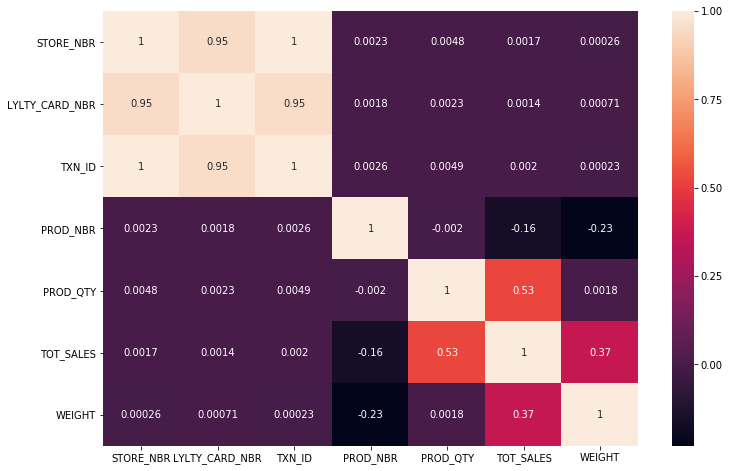

In [112]:
plt.subplots(figsize=(12,8))
sns.heatmap(combined_df.corr(),annot=True)

### Time-Series Analysis:

#### Number of transactions over time:

In [77]:
df13 = combined_df.groupby('DATE', as_index=False)['TXN_ID'].count()
df13

,DATE,TXN_ID
0,2019-07-03,724
1,2019-07-04,711
2,2019-07-05,722
3,2019-07-06,714
4,2019-07-07,712
5,2019-07-08,762
6,2019-07-09,750
7,2019-07-10,696
8,2019-07-11,749
9,2019-07-12,705


In [78]:
combined_df.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'LIFESTAGE', 'PREMIUM_CUSTOMER',
       'BRAND', 'WEIGHT'],
      dtype='object')

In [79]:
combined_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,BRAND,WEIGHT
0,2019-10-19,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,Natural Chip Company,175
1,2020-05-15,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,CCs,175
2,2019-11-12,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget,WW,160
3,2020-03-10,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget,CCs,175
4,2020-05-21,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,Smiths,170
5,2019-08-19,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget,Smiths,175
6,2019-08-20,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget,Kettle,150
7,2020-05-20,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1,MIDAGE SINGLES/COUPLES,Budget,Old,300
8,2019-08-08,4,4074,2978,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,MIDAGE SINGLES/COUPLES,Budget,Tyrrells,165
9,2019-08-11,4,4074,2979,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,MIDAGE SINGLES/COUPLES,Budget,Kettle,150


C:\Users\Nitai CalpakkamAnand\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


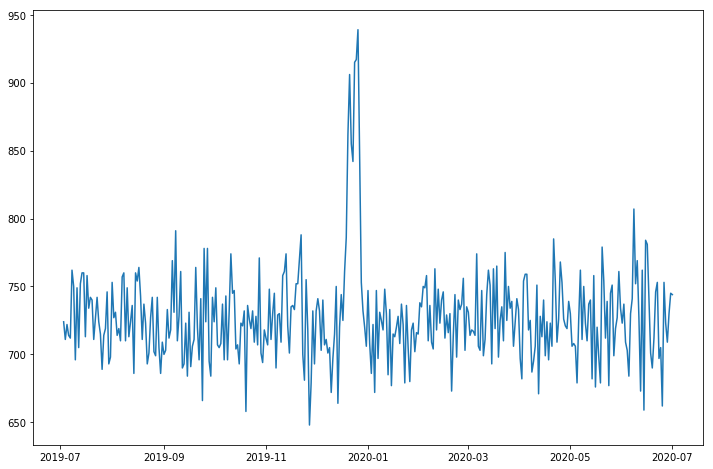

In [80]:
plt.subplots(figsize=(12,8))
plt.plot(df13['DATE'],df13['TXN_ID'])


#### Number of Sales over time:

In [81]:
df14 = combined_df.groupby('DATE', as_index=False)['TOT_SALES'].sum()
df14

,DATE,TOT_SALES
0,2019-07-03,5372.2
1,2019-07-04,5315.4
2,2019-07-05,5321.8
3,2019-07-06,5309.9
4,2019-07-07,5080.9
5,2019-07-08,5604.9
6,2019-07-09,5378.3
7,2019-07-10,5021.1
8,2019-07-11,5518.9
9,2019-07-12,5068.5


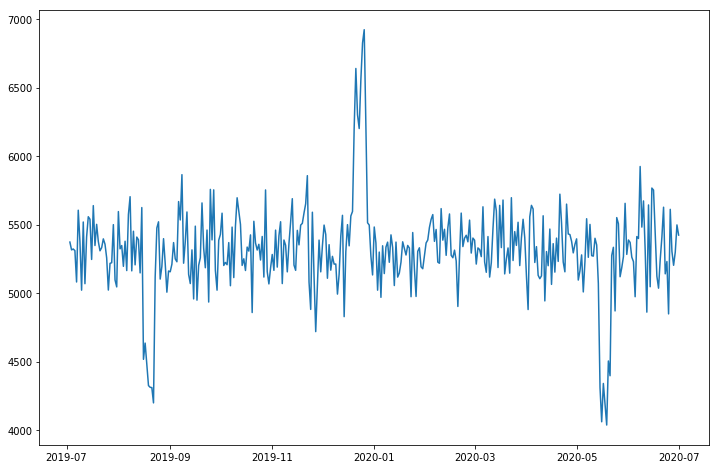

In [82]:
plt.subplots(figsize=(12,8))
plt.plot(df14['DATE'],df14['TOT_SALES'])

In [83]:
df15 = combined_df.groupby('DATE', as_index=False)['PROD_QTY'].sum()
df15

,DATE,PROD_QTY
0,2019-07-03,1394
1,2019-07-04,1367
2,2019-07-05,1389
3,2019-07-06,1373
4,2019-07-07,1358
5,2019-07-08,1466
6,2019-07-09,1444
7,2019-07-10,1336
8,2019-07-11,1441
9,2019-07-12,1338


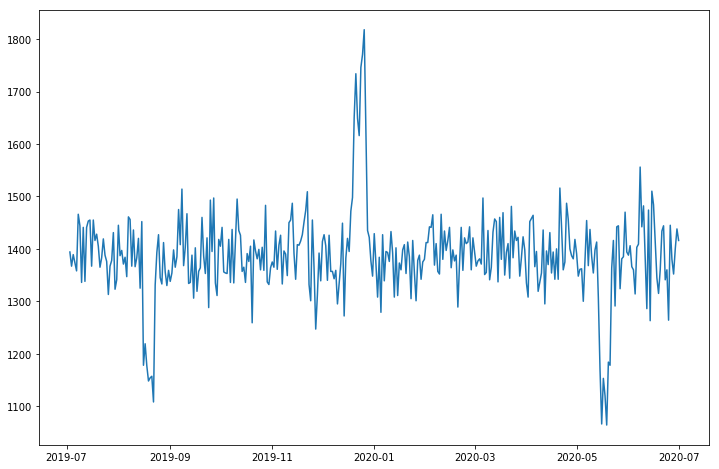

In [84]:
plt.subplots(figsize=(12,8))
plt.plot(df15['DATE'],df15['PROD_QTY'])

### Driver of Sales:
1. Customers that made the most purchases.
2. Customer segment that made the most sales.
3. Product that was bought the most
4. Product that was bought the least
5. Customer Lifestages Saleswise Depiction.
6. Which store had the most sales
7. Which store had the least sales
8. Brand wise Sales
9. Top 10 weight classes from each of top 10 brands that had the most purchases
10. Brand preferences according to Life stages
11. Check for correlation between each column
12. Who spends the most on chips (total sales), describing customers by lifestage and how premium their general purchasing behaviour is
13. How many customers are in each segment
14. How many chips are bought per customer by segment
15. What’s the average chip price by customer segment
16. How many transactions, purchase quantity and sales did each customer make? plot stacked graph for top 20 and bottom 20.

#### 1. Customers that made the most purchases:

In [55]:
df1 = combined_df.groupby(['LYLTY_CARD_NBR','STORE_NBR'], as_index=False)['PROD_QTY'].sum().nlargest(10,'PROD_QTY')
df1

,LYLTY_CARD_NBR,STORE_NBR,PROD_QTY
42813,162039,162,36
60924,230078,230,36
45905,172032,172,35
3686,13138,13,34
31654,116181,116,34
34943,128178,128,33
68901,257202,257,33
17292,63197,63,32
25958,94185,94,32
28457,104117,104,32


<BarContainer object of 10 artists>

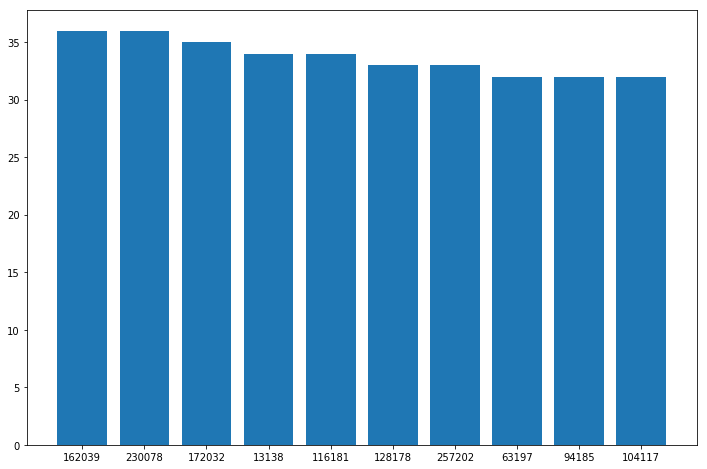

In [56]:
plt.subplots(figsize=(12,8))
plt.bar(df1['LYLTY_CARD_NBR'].astype(str), height=df1['PROD_QTY'])

#### 2.Customer Groups that bought the most:

In [57]:
df2 = combined_df.groupby('PREMIUM_CUSTOMER', as_index=False)['TOT_SALES'].sum()
df2.head()


,PREMIUM_CUSTOMER,TOT_SALES
0,Budget,676211.55
1,Mainstream,750744.50
2,Premium,506158.95


Text(0.5, 1.0, 'Total Sales by Customer Segment')

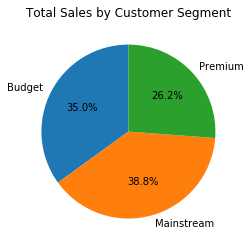

In [97]:
#plt.subplots(figsize=(8,8))
plt.pie(df2['TOT_SALES'], labels=df2['PREMIUM_CUSTOMER'],autopct='%1.1f%%', startangle=90)
plt.title('Total Sales by Customer Segment')
#plt.xlabel('Customer Segment')
#plt.ylabel('Total Sales')

#### 3.Products that were bought the most:

In [108]:
df3 = combined_df.groupby('PROD_NAME', as_index=False)['PROD_QTY'].sum().nlargest(15, 'PROD_QTY')
df3

,PROD_NAME,PROD_QTY
33,Kettle Mozzarella Basil & Pesto 175g,6381
42,Kettle Tortilla ChpsHny&Jlpno Chili 150g,6309
8,Cobs Popd Sea Salt Chips 110g,6277
10,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,6256
98,Tostitos Splash Of Lime 175g,6234
102,Tyrrells Crisps Ched & Chives 165g,6227
30,Kettle 135g Swt Pot Sea Salt,6212
28,Infuzions Thai SweetChili PotatoMix 110g,6206
95,Thins Potato Chips Hot & Spicy 175g,6185
15,Doritos Corn Chips Cheese Supreme 170g,6180


Text(0.5, 1.0, 'Products that were bought the most')

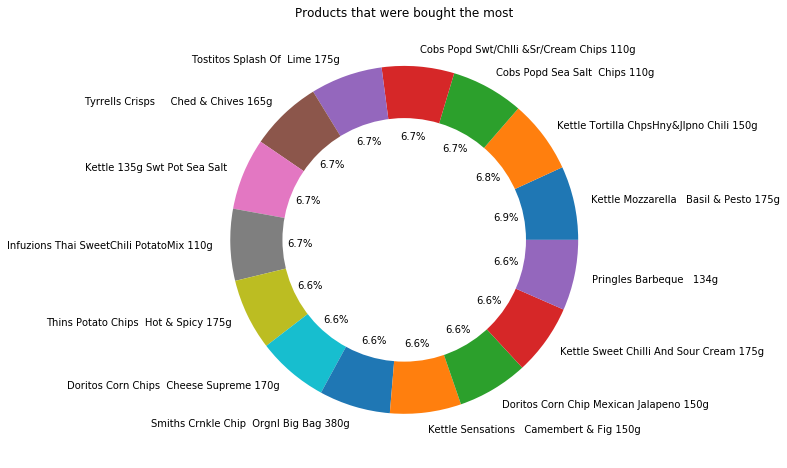

In [109]:
plt.subplots(figsize=(12,8))
plt.pie(df3['PROD_QTY'], labels=df3['PROD_NAME'], autopct="%1.1f%%", startangle=0)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Products that were bought the most')

#### 4. Products that were bought the least:

In [110]:
df4=combined_df.groupby('PROD_NAME',as_index=False)['PROD_QTY'].sum().nsmallest(15,'PROD_QTY')
df4

,PROD_NAME,PROD_QTY
21,French Fries Potato Chips 175g,2643
105,WW Crinkle Cut Original 175g,2666
43,NCC Sour Cream & Garden Chives 175g,2682
112,Woolworths Medium Salsa 300g,2700
62,RRD Pc Sea Salt 165g,2702
90,Sunbites Whlegrn Crisps Frch/Onin 90g,2706
82,Smiths Crinkle Cut French OnionDip 150g,2710
91,Thins Chips Originl saltd 175g,2727
5,Cheetos Puffs 165g,2729
7,Cheezels Cheese Box 125g,2730


Text(0.5, 1.0, 'Products that were bought the least')

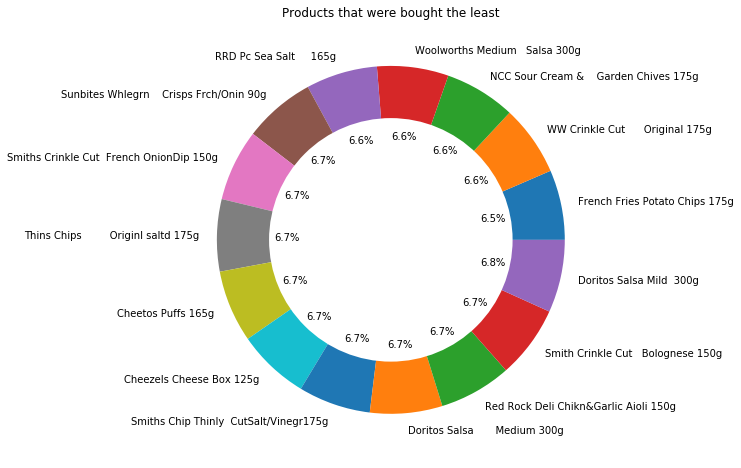

In [111]:
plt.subplots(figsize=(12,8))
plt.pie(df4['PROD_QTY'], labels=df4['PROD_NAME'], autopct="%1.1f%%", startangle=0)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Products that were bought the least')


#### 5.Customer Lifestages Saleswise Depiction:

In [63]:
df5 = combined_df.groupby('LIFESTAGE', as_index=False)['TOT_SALES'].sum()
df5

,LIFESTAGE,TOT_SALES
0,MIDAGE SINGLES/COUPLES,184751.30
1,NEW FAMILIES,50433.45
2,OLDER FAMILIES,352467.20
3,OLDER SINGLES/COUPLES,402426.75
4,RETIREES,366470.90
5,YOUNG FAMILIES,316160.10
6,YOUNG SINGLES/COUPLES,260405.30


(array([], dtype=float64), <a list of 0 Text xticklabel objects>)

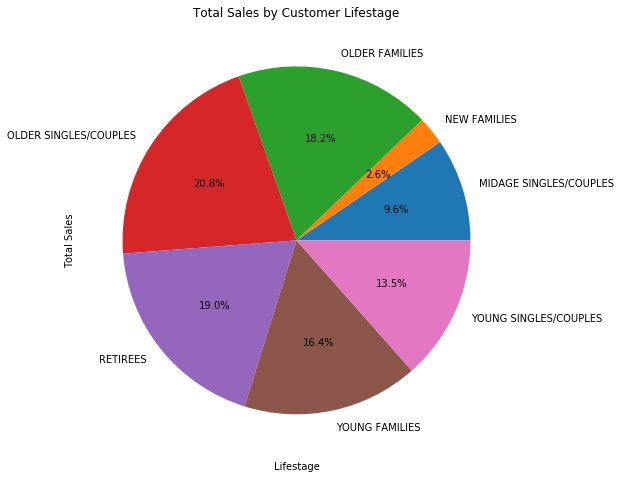

In [104]:
plt.subplots(figsize=(12,8))
plt.pie(df5['TOT_SALES'], labels=df5['LIFESTAGE'], autopct='%1.1f%%', startangle=0)
plt.title('Total Sales by Customer Lifestage')
plt.xlabel('Lifestage')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)

#### 6. Which store had the most sales:

In [65]:
df6=combined_df.groupby('STORE_NBR', as_index=False)[['PROD_QTY','TOT_SALES']].sum().nlargest(10,'PROD_QTY')
df6

,STORE_NBR,PROD_QTY,TOT_SALES
225,226,4001,17605.45
87,88,3718,16333.25
92,93,3639,12813.80
164,165,3602,15973.75
42,43,3519,12384.55
236,237,3515,15539.50
39,40,3499,15559.50
229,230,3476,12287.00
212,213,3470,12364.60
57,58,3463,15251.45


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

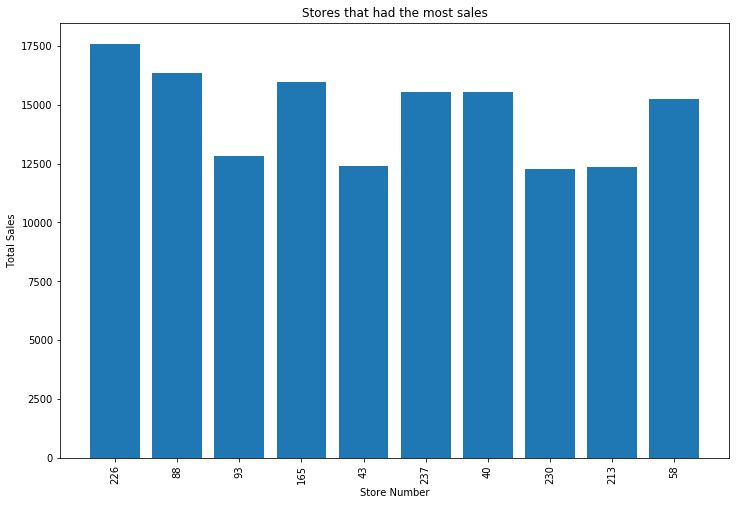

In [66]:
plt.subplots(figsize=(12,8))
plt.bar(df6['STORE_NBR'].astype(str), height=df6['TOT_SALES'])
plt.title('Stores that had the most sales')
plt.xlabel('Store Number')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)

#### 7. Which store had the least sales:

In [67]:
df7 = combined_df.groupby('STORE_NBR', as_index=False)[['PROD_QTY','TOT_SALES']].sum().nsmallest(10,'PROD_QTY')
df7

,STORE_NBR,PROD_QTY,TOT_SALES
10,11,2,6.7
75,76,2,6.0
91,92,2,9.2
205,206,2,7.6
210,211,2,5.2
251,252,2,7.4
30,31,4,14.8
192,193,4,13.1
84,85,5,13.9
116,117,47,161.8


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

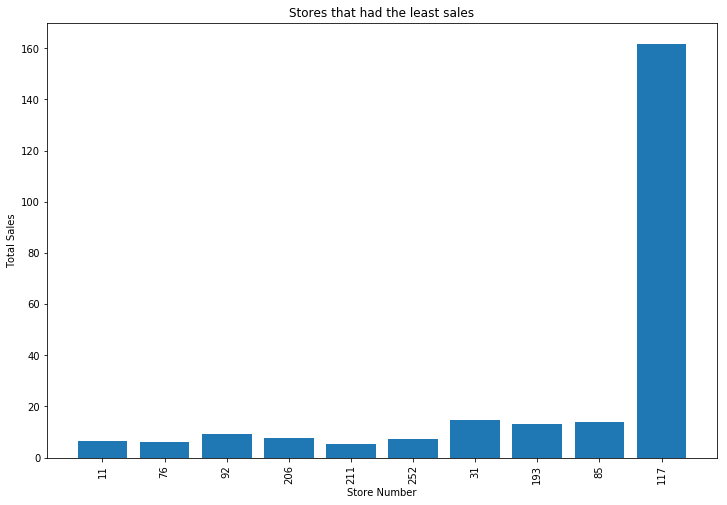

In [68]:
plt.subplots(figsize=(12,8))
plt.bar(df7['STORE_NBR'].astype(str), height=df7['TOT_SALES'])
plt.title('Stores that had the least sales')
plt.xlabel('Store Number')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)

#### 8. Brand wise Sales:

In [69]:
df8 = combined_df.groupby('BRAND', as_index=False)[['PROD_QTY','TOT_SALES']].sum()
print(df8)

                   BRAND  PROD_QTY  TOT_SALES
0                 Burger      2970     6831.0
1                    CCs      8609    18078.9
2                Cheetos      5530    16884.5
3               Cheezels      8747    40029.9
4                   Cobs     18571    70569.8
5                Doritos     53816   240590.9
6                 French      2643     7929.0
7             GrainWaves     14726    51617.2
8              Infuzions     27119    99047.6
9                 Kettle     79051   390239.8
10  Natural Chip Company     14106    42318.0
11                   Old     17805    90785.1
12              Pringles     48019   177655.5
13         Red Rock Deli     33646    95046.0
14                Smiths     60339   224660.2
15              Sunbites      5692     9676.4
16                 Thins     26929    88852.5
17              Tostitos     18134    79789.6
18              Twisties     18118    81522.1
19              Tyrrells     12298    51647.4
20                    WW     19461

Text(0.5, 1.0, 'Brandwise Sales')

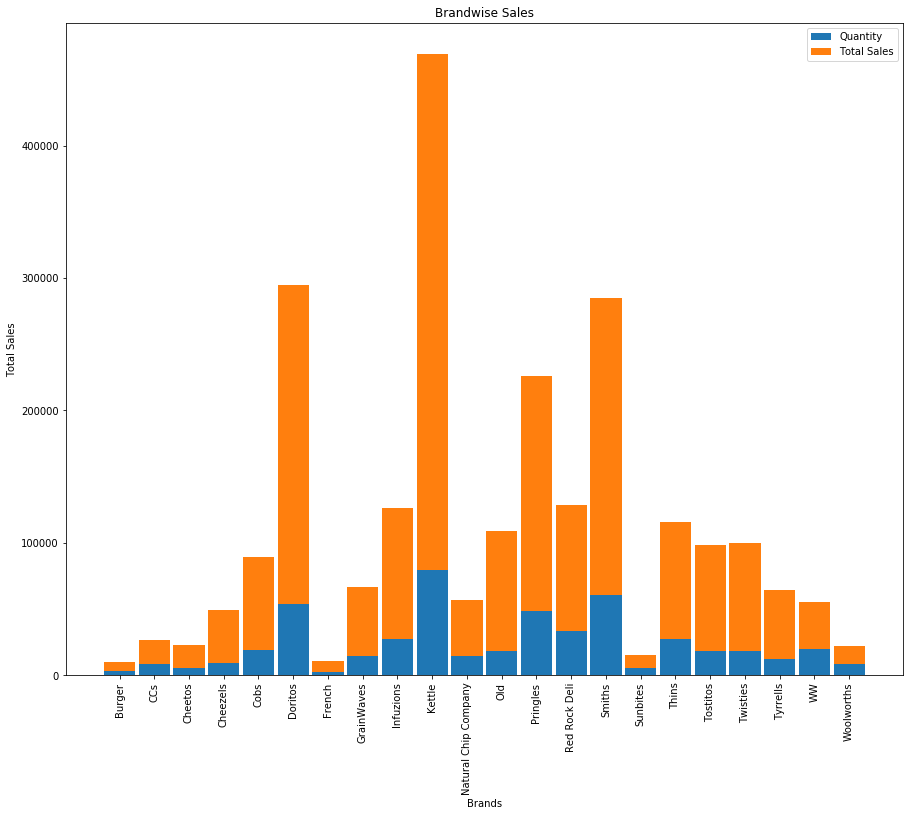

In [70]:
plt.subplots(figsize=(15,12))
p1=plt.bar(df8['BRAND'], df8['PROD_QTY'], 0.9)
p2=plt.bar(df8['BRAND'], df8['TOT_SALES'], bottom=df8['PROD_QTY'], width=0.9)
plt.xlabel('Brands')
plt.xticks(rotation=90)
plt.ylabel('Total Sales')
plt.legend((p1[0],p2[0]),('Quantity','Total Sales'))
plt.title('Brandwise Sales')

#### 9.Top 10 weight classes from each of top 10 brands that had the most purchases:

In [71]:
df9 = combined_df.groupby(['BRAND','WEIGHT'], as_index=False)[['PROD_QTY','TOT_SALES']].sum().nlargest(10,'PROD_QTY')
df9

,BRAND,WEIGHT,PROD_QTY,TOT_SALES
22,Pringles,134,48019,177655.5
19,Kettle,175,36425,196668.0
18,Kettle,150,36414,167481.4
31,Thins,175,26929,88852.5
16,Infuzions,110,24264,92195.6
8,Doritos,170,24153,106264.4
23,Red Rock Deli,150,19622,52974.0
6,Cobs,110,18571,70569.8
32,Tostitos,175,18134,79789.6
21,Old,300,17805,90785.1


In [72]:
combined_df.groupby(['BRAND','WEIGHT','STORE_NBR','LIFESTAGE','PREMIUM_CUSTOMER'], as_index=False)[['PROD_QTY','TOT_SALES']].sum().nlargest(10,'PROD_QTY')

,BRAND,WEIGHT,STORE_NBR,LIFESTAGE,PREMIUM_CUSTOMER,PROD_QTY,TOT_SALES
52523,Pringles,134,201,RETIREES,Mainstream,70,259.0
53130,Pringles,134,238,YOUNG SINGLES/COUPLES,Mainstream,67,247.9
52890,Pringles,134,226,OLDER FAMILIES,Budget,63,233.1
50204,Pringles,134,58,RETIREES,Mainstream,60,222.0
52479,Pringles,134,199,OLDER SINGLES/COUPLES,Budget,60,222.0
50817,Pringles,134,95,OLDER FAMILIES,Budget,59,218.3
51298,Pringles,134,123,YOUNG SINGLES/COUPLES,Mainstream,59,218.3
52567,Pringles,134,203,YOUNG SINGLES/COUPLES,Mainstream,59,218.3
53487,Pringles,134,261,OLDER SINGLES/COUPLES,Premium,58,214.6
50241,Pringles,134,60,OLDER SINGLES/COUPLES,Budget,57,210.9


In [73]:
combined_df.groupby(['BRAND','WEIGHT','STORE_NBR','LIFESTAGE','PREMIUM_CUSTOMER'], as_index=False)[['PROD_QTY','TOT_SALES']].sum().nsmallest(10,'PROD_QTY')

,BRAND,WEIGHT,STORE_NBR,LIFESTAGE,PREMIUM_CUSTOMER,PROD_QTY,TOT_SALES
0,Burger,220,1,OLDER SINGLES/COUPLES,Budget,1,2.3
1,Burger,220,1,OLDER SINGLES/COUPLES,Premium,1,2.3
2,Burger,220,1,RETIREES,Budget,1,2.3
3,Burger,220,1,YOUNG FAMILIES,Premium,1,2.3
5,Burger,220,1,YOUNG SINGLES/COUPLES,Mainstream,1,2.3
6,Burger,220,1,YOUNG SINGLES/COUPLES,Premium,1,2.3
7,Burger,220,2,MIDAGE SINGLES/COUPLES,Mainstream,1,2.3
8,Burger,220,2,OLDER FAMILIES,Budget,1,2.3
10,Burger,220,2,OLDER SINGLES/COUPLES,Mainstream,1,2.3
11,Burger,220,2,YOUNG FAMILIES,Budget,1,2.3


#### 10. Brand preferences according to Life stages:

In [74]:
df11 = combined_df.groupby(['LIFESTAGE','BRAND'], as_index=False)[['PROD_NAME']].count().nlargest(799,'PROD_NAME')
df11

,LIFESTAGE,BRAND,PROD_NAME
75,OLDER SINGLES/COUPLES,Kettle,8847
97,RETIREES,Kettle,8194
53,OLDER FAMILIES,Kettle,6851
58,OLDER FAMILIES,Smiths,6443
80,OLDER SINGLES/COUPLES,Smiths,6320
119,YOUNG FAMILIES,Kettle,6277
71,OLDER SINGLES/COUPLES,Doritos,5920
141,YOUNG SINGLES/COUPLES,Kettle,5893
124,YOUNG FAMILIES,Smiths,5673
102,RETIREES,Smiths,5613


In [75]:
df12 = combined_df.groupby(['PREMIUM_CUSTOMER','BRAND'], as_index=False)['TOT_SALES'].sum()
df12

,PREMIUM_CUSTOMER,BRAND,TOT_SALES
0,Budget,Burger,2527.70
1,Budget,CCs,6657.00
2,Budget,Cheetos,6071.60
3,Budget,Cheezels,13983.90
4,Budget,Cobs,23780.40
5,Budget,Doritos,83961.25
6,Budget,French,3042.00
7,Budget,GrainWaves,17770.00
8,Budget,Infuzions,34272.00
9,Budget,Kettle,134407.80


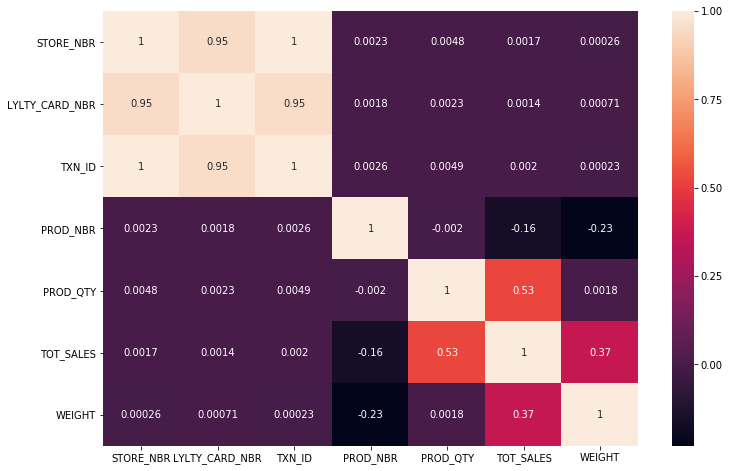

#### 13. How many customers are in each segment

In [85]:
df18 = combined_df.groupby('LIFESTAGE', as_index=False)['LYLTY_CARD_NBR'].count()
df18

,LIFESTAGE,LYLTY_CARD_NBR
0,MIDAGE SINGLES/COUPLES,25110
1,NEW FAMILIES,6919
2,OLDER FAMILIES,48594
3,OLDER SINGLES/COUPLES,54479
4,RETIREES,49763
5,YOUNG FAMILIES,43592
6,YOUNG SINGLES/COUPLES,36377


(0.0, 100.0, 0.0, 100.0)

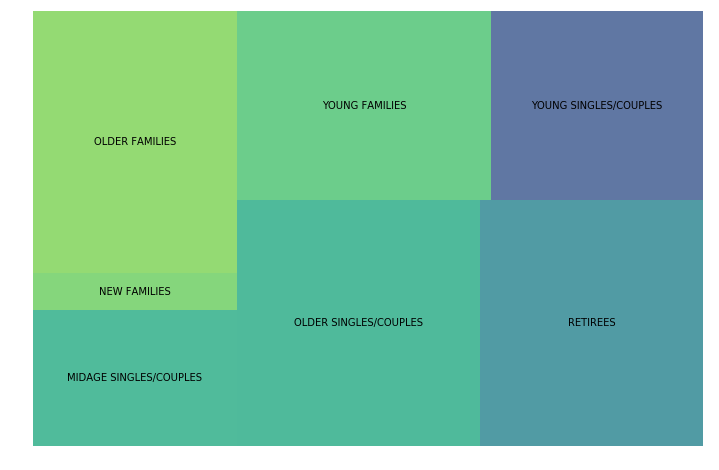

In [86]:
plt.subplots(figsize=(12,8))
squarify.plot(sizes = df18['LYLTY_CARD_NBR'], label = df18['LIFESTAGE'], alpha=.8)
plt.axis('off')

#### 14. How many products are bought per customer by segment

In [87]:
df17 = combined_df.groupby('LIFESTAGE', as_index=False)['PROD_QTY'].sum()
df17

,LIFESTAGE,PROD_QTY
0,MIDAGE SINGLES/COUPLES,47721
1,NEW FAMILIES,12847
2,OLDER FAMILIES,94592
3,OLDER SINGLES/COUPLES,104203
4,RETIREES,94166
5,YOUNG FAMILIES,84561
6,YOUNG SINGLES/COUPLES,66634


(0.0, 100.0, 0.0, 100.0)

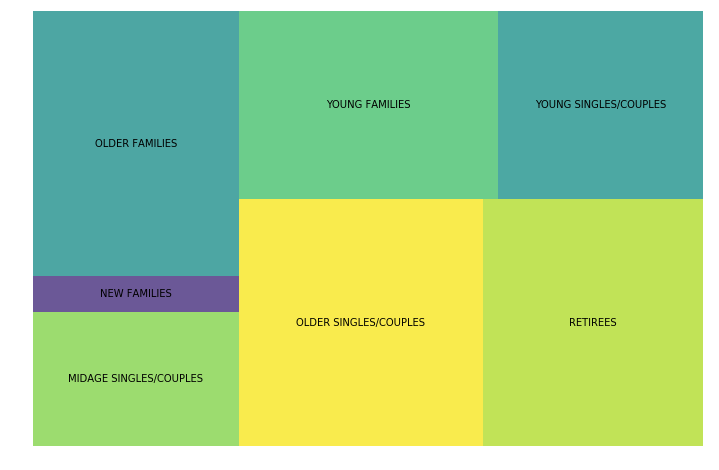

In [88]:
plt.subplots(figsize=(12,8))
squarify.plot(sizes = df17['PROD_QTY'], label = df17['LIFESTAGE'], alpha=.8)
plt.axis('off')

#### 15.What’s the average chip price by customer segment

In [89]:
df16 = combined_df.groupby('LIFESTAGE', as_index=False)['TOT_SALES'].mean()
df16

,LIFESTAGE,TOT_SALES
0,MIDAGE SINGLES/COUPLES,7.357678
1,NEW FAMILIES,7.289124
2,OLDER FAMILIES,7.253307
3,OLDER SINGLES/COUPLES,7.386823
4,RETIREES,7.364325
5,YOUNG FAMILIES,7.252709
6,YOUNG SINGLES/COUPLES,7.158515


(0.0, 100.0, 0.0, 100.0)

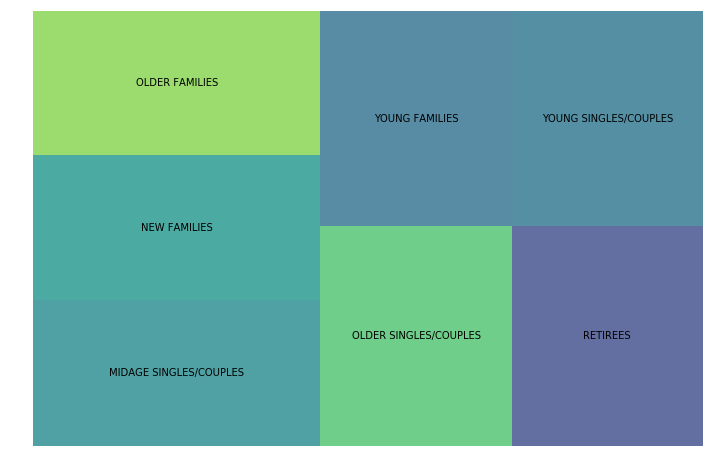

In [90]:
plt.subplots(figsize=(12,8))
squarify.plot(sizes = df16['TOT_SALES'], label = df16['LIFESTAGE'], alpha=.8)
plt.axis('off')

#### 16. How many transactions, purchase quantity and sales did each customer make? 
Plot stacked graph for top 20 and bottom 20.

In [113]:
df17 = combined_df.groupby('LYLTY_CARD_NBR', as_index=False)['TXN_ID'].count()
df17

,LYLTY_CARD_NBR,TXN_ID
0,1000,1
1,1002,1
2,1003,2
3,1004,1
4,1005,1
5,1007,2
6,1009,1
7,1010,2
8,1011,4
9,1012,2


In [114]:
df18 = combined_df.groupby('LYLTY_CARD_NBR', as_index=False)[['PROD_QTY', 'TOT_SALES']].sum()
df18

,LYLTY_CARD_NBR,PROD_QTY,TOT_SALES
0,1000,2,6.0
1,1002,1,2.7
2,1003,2,6.6
3,1004,1,1.9
4,1005,1,2.8
5,1007,2,6.5
6,1009,1,5.7
7,1010,3,13.9
8,1011,5,18.0
9,1012,2,10.3


In [126]:
df19 = pd.merge(df17, df18, on='LYLTY_CARD_NBR')
df19

,LYLTY_CARD_NBR,TXN_ID,PROD_QTY,TOT_SALES
0,1000,1,2,6.0
1,1002,1,1,2.7
2,1003,2,2,6.6
3,1004,1,1,1.9
4,1005,1,1,2.8
5,1007,2,2,6.5
6,1009,1,1,5.7
7,1010,2,3,13.9
8,1011,4,5,18.0
9,1012,2,2,10.3


In [128]:
df20 = df19.nlargest(20, 'TXN_ID')
df20

,LYLTY_CARD_NBR,TXN_ID,PROD_QTY,TOT_SALES
42813,162039,18,36,126.8
45905,172032,18,35,120.1
3686,13138,17,34,109.0
31654,116181,17,34,117.6
34943,128178,17,33,99.7
60924,230078,17,36,138.6
6530,23192,16,31,114.7
25958,94185,16,32,122.8
28457,104117,16,32,109.6
28605,105026,16,31,114.2


Text(0.5, 1.0, 'Brandwise Sales')

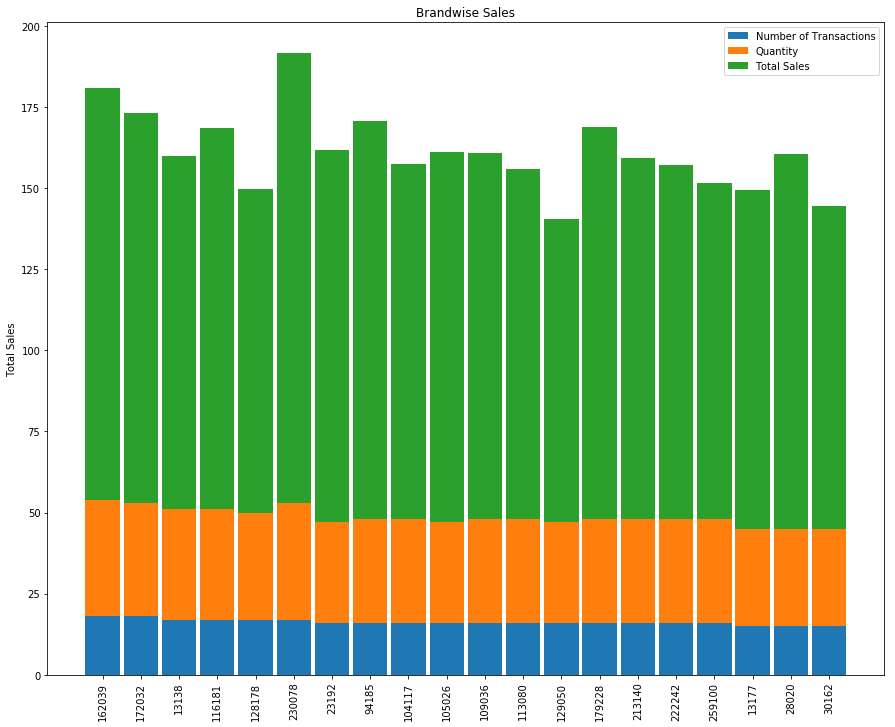

In [137]:
plt.subplots(figsize=(15,12))
p1=plt.bar(df20['LYLTY_CARD_NBR'].astype('str'), df20['TXN_ID'], width=0.9)
p2=plt.bar(df20['LYLTY_CARD_NBR'].astype('str'), df20['PROD_QTY'],bottom=df20['TXN_ID'], width=0.9)
p3=plt.bar(df20['LYLTY_CARD_NBR'].astype('str'), df20['TOT_SALES'], bottom=df20['PROD_QTY']+df20['TXN_ID'], width=0.9)
plt.xticks(rotation=90)
plt.xlabel('Loyalty Card Numbers')
plt.legend((p1[0],p2[0],p3[0]),('Number of Transactions','Quantity','Total Sales'))
plt.title('Brandwise Sales')

In [129]:
df21 = df19.nsmallest(20, 'TXN_ID')
df21

,LYLTY_CARD_NBR,TXN_ID,PROD_QTY,TOT_SALES
0,1000,1,2,6.0
1,1002,1,1,2.7
3,1004,1,1,1.9
4,1005,1,1,2.8
6,1009,1,1,5.7
13,1019,1,1,3.1
15,1022,1,1,4.6
16,1023,1,1,3.0
17,1024,1,1,3.0
18,1025,1,2,6.0


Text(0.5, 1.0, 'Sales per member')

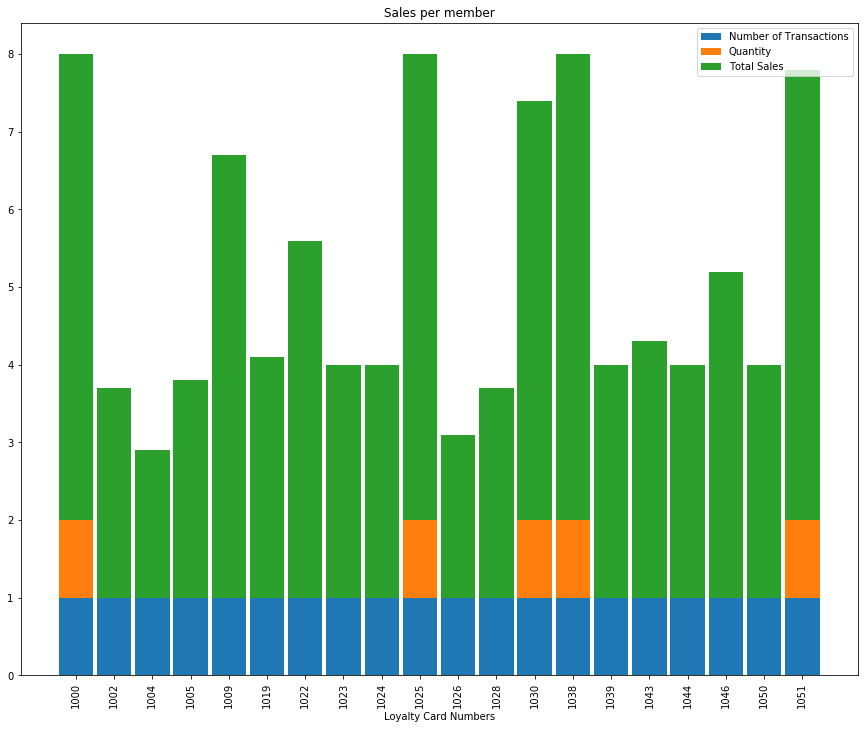

In [141]:
plt.subplots(figsize=(15,12))
p1=plt.bar(df21['LYLTY_CARD_NBR'].astype('str'), df21['TXN_ID'], width=0.9)
p2=plt.bar(df21['LYLTY_CARD_NBR'].astype('str'), df21['PROD_QTY'],bottom=df21['TXN_ID'], width=0.9)
p3=plt.bar(df21['LYLTY_CARD_NBR'].astype('str'), df21['TOT_SALES'], bottom=df21['PROD_QTY'], width=0.9)
plt.xticks(rotation=90)
plt.xlabel('Loyalty Card Numbers')
plt.legend((p1[0],p2[0],p3[0]),('Number of Transactions','Quantity','Total Sales'))
plt.title('Sales per member')

# Conclusion:

The objective of this analysis with the given dataset, was to use consumer analytics to study the customer purchase patterns, the products they bought and the products they did not favor to ultimately find and place the right chips products at the right place in a supermarket with the intent to attract customers and therefore drive up sales. From the above dissections, I would like to recommend certain products be placed in certain positions:

Positions:
1. Top shelf
2. 2nd Shelf
3. 3rd Shelf
3. Bottom shelf

Entry-Points: 
Entry and Exit

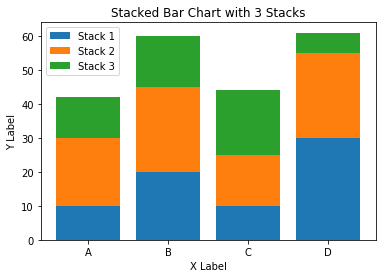

In [118]:
x = ['A', 'B', 'C', 'D']
y1 = np.array([10, 20, 10, 30])
y2 = np.array([20, 25, 15, 25])
y3 = np.array([12, 15, 19, 6])

fig, ax = plt.subplots()

ax.bar(x, y1, label='Stack 1')
ax.bar(x, y2, bottom=y1, label='Stack 2')
ax.bar(x, y3, bottom=y1+y2, label='Stack 3')

ax.set_ylabel('Y Label')
ax.set_xlabel('X Label')
ax.set_title('Stacked Bar Chart with 3 Stacks')
ax.legend()

plt.show()